In [2]:
# -------------------------------------------
# 01  Load packages
# -------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# EDA helper
from pandas.api.types import is_numeric_dtype, is_object_dtype

# -------------------------------------------
# 02  Load data
# -------------------------------------------
df = pd.read_excel("window_breakage_data.xlsx")  # ← 確認路徑正確

In [3]:
# 2-1   Drop duplicated column
df = df.drop(columns=["YldFrctn"])

# 2-2   Basic info
print(df.shape)
display(df.head())
df.info()

# 2-3   Describe numeric cols
display(df.describe().T)

# 2-4   Missing-value table
miss_tbl = df.isna().sum().to_frame("MissingCount")
miss_tbl["MissingPct"] = miss_tbl["MissingCount"] / len(df)
display(miss_tbl.sort_values("MissingPct", ascending=False).head(20))

(1301, 17)


,PF Rowstate,Batch,Breakage Rate,Yield,YieldX,Pass/Fail,Window Size,Glass thickness,Ambient Temp,Cut speed,Edge Deletion rate,Spacer Distance,Window color,Window Type,Glass Supplier,Silicon Viscosity,Glass Supplier Location
0,1024.0,4011,6.207,93.793358,1.216623,Pass,69.410127,0.5076,19.421091,1.520784,15.515228,3.299172,79.90,Vinyl,Supplier A,8.942454,Minnesota
1,1024.0,4015,2.884,97.110487,1.329818,Pass,62.054341,0.5015,11.809967,2.606436,14.571468,5.597298,83.21,Vinyl,Supplier C,8.409810,Iowa
2,1024.0,4016,4.586,95.413742,1.266765,Pass,56.379612,0.5091,23.466869,1.140074,15.409698,4.831903,92.09,Aluminum,Supplier D,10.338810,Wisconsin
3,1024.0,4017,1.823,98.120298,1.376600,Pass,62.776805,0.5061,18.177280,1.868036,15.728905,4.719640,78.57,Wood,Supplier C,15.181158,Iowa
4,1024.0,4018,0.601,99.228920,1.446533,Pass,NaN,0.5092,23.517670,0.614988,15.408881,5.638548,70.29,Vinyl,NaN,13.333607,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PF Rowstate              1300 non-null   float64
 1   Batch                    1301 non-null   int64  
 2   Breakage Rate            1301 non-null   float64
 3   Yield                    1300 non-null   float64
 4   YieldX                   1300 non-null   float64
 5   Pass/Fail                1300 non-null   object 
 6   Window Size              1213 non-null   float64
 7   Glass thickness          1301 non-null   float64
 8   Ambient Temp             1270 non-null   float64
 9   Cut speed                1249 non-null   float64
 10  Edge Deletion rate       1236 non-null   float64
 11  Spacer Distance          1285 non-null   float64
 12  Window color             1301 non-null   float64
 13  Window Type              1282 non-null   object 
 14  Glass Supplier          

,count,mean,std,min,25%,50%,75%,max
PF Rowstate,1300.0,946.609231,117.615249,768.000000,768.000000,1024.000000,1024.000000,1024.000000
Batch,1301.0,5011.026134,580.423565,4011.000000,4511.000000,5003.000000,5518.000000,6010.000000
Breakage Rate,1301.0,6.276304,5.716120,0.004000,2.547000,4.460000,8.193000,36.156000
Yield,1300.0,93.699179,5.696379,63.844012,91.803430,95.549964,97.440261,99.992966
YieldX,1300.0,1.244589,0.148797,0.692470,1.163094,1.271349,1.344048,1.558935
Window Size,1213.0,63.758223,7.158120,51.919507,56.942267,64.424635,70.039760,75.568636
Glass thickness,1301.0,0.502752,0.006113,0.479700,0.498700,0.502900,0.507000,0.523100
Ambient Temp,1270.0,16.198353,4.572135,8.392694,11.944914,16.338422,20.166265,24.098396
Cut speed,1249.0,1.872380,0.802577,0.296450,1.227402,1.901043,2.536933,3.217969
Edge Deletion rate,1236.0,15.718308,1.177423,13.752582,14.672490,15.680710,16.731976,17.747635


,MissingCount,MissingPct
Window Size,88,0.067640
Edge Deletion rate,65,0.049962
Cut speed,52,0.039969
Glass Supplier Location,32,0.024596
Glass Supplier,31,0.023828
Ambient Temp,31,0.023828
Silicon Viscosity,24,0.018447
Window Type,19,0.014604
Spacer Distance,16,0.012298
Pass/Fail,1,0.000769


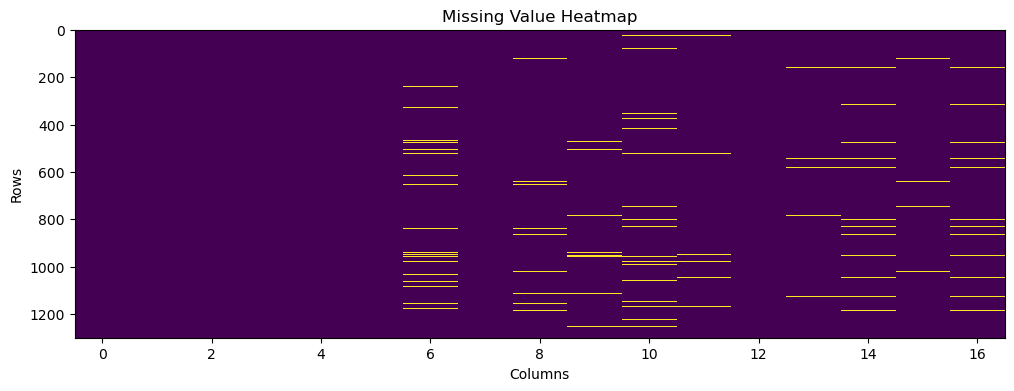

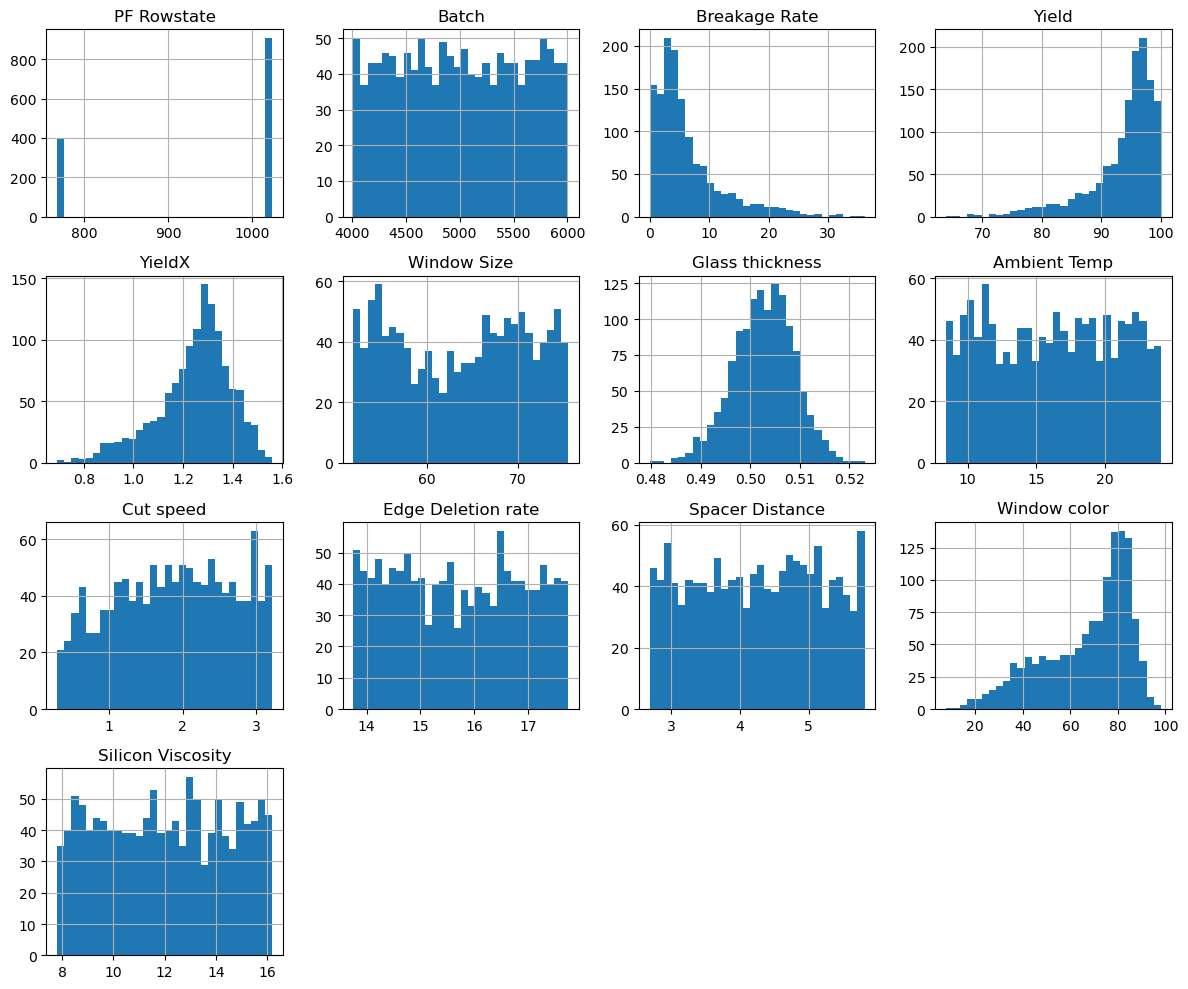

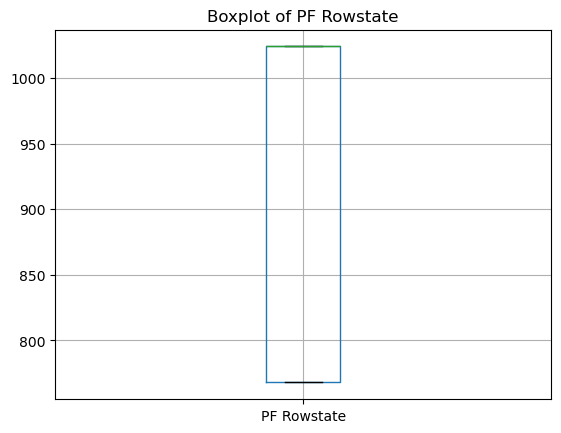

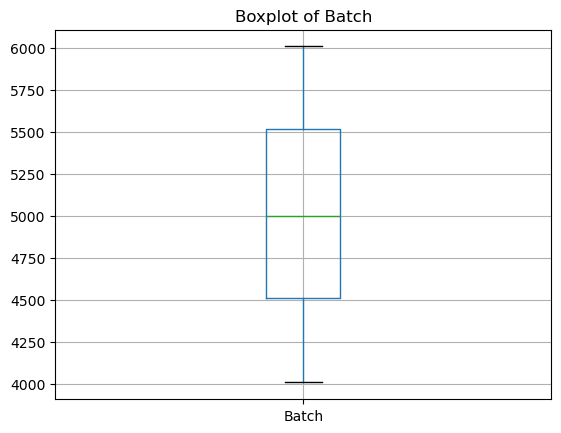

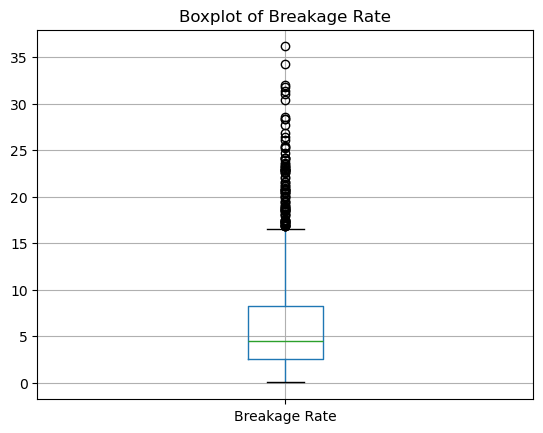

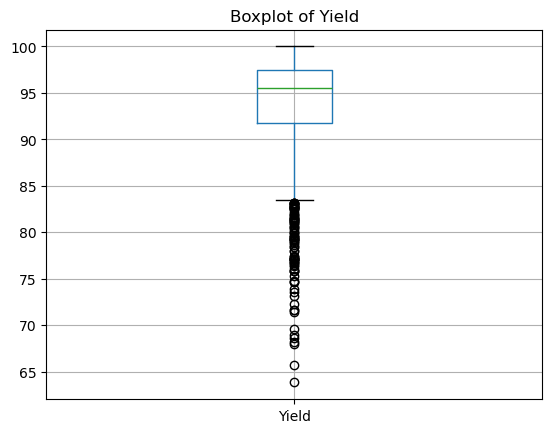

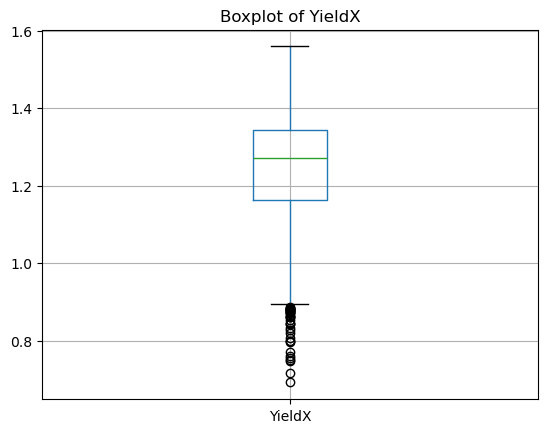

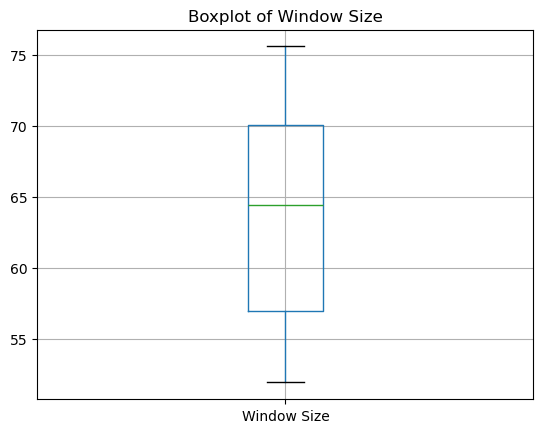

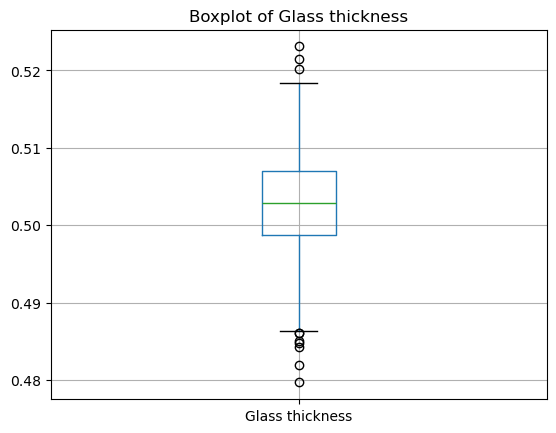

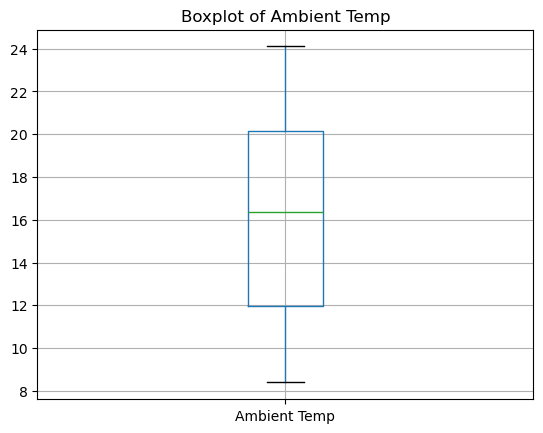

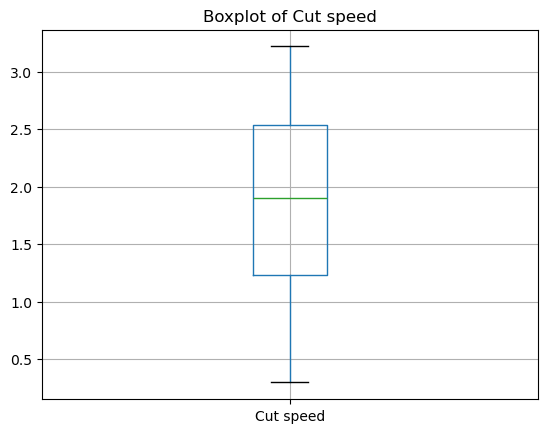

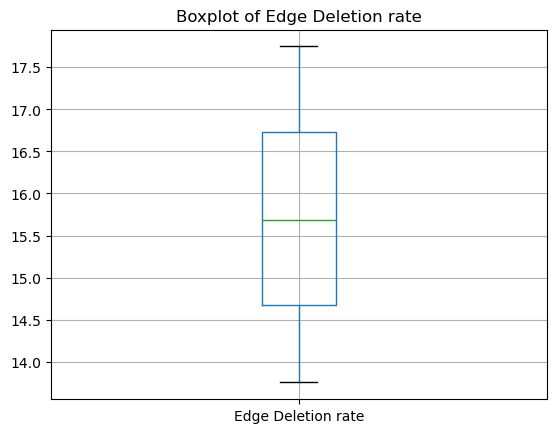

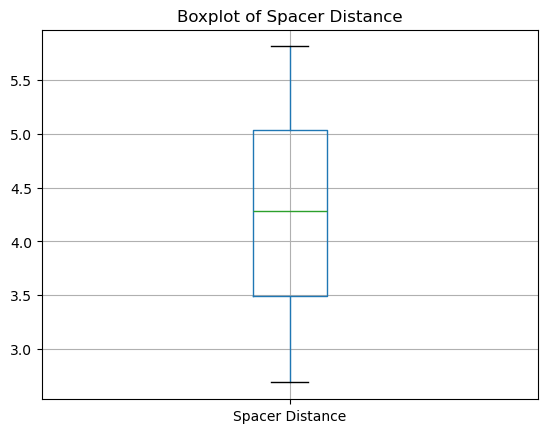

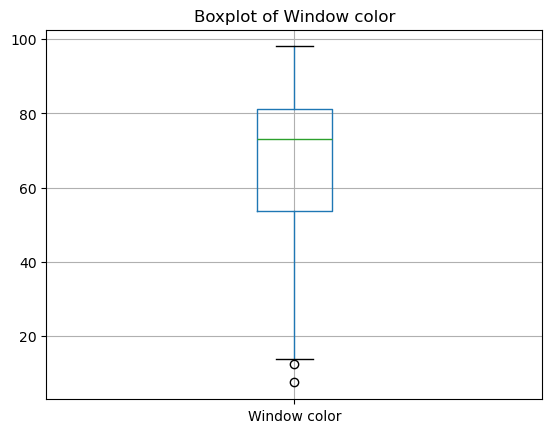

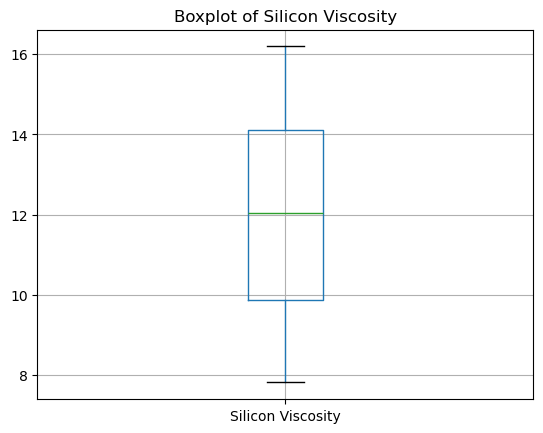

In [4]:
# 3-1   Missing heatmap (uses matplotlib only)
plt.figure(figsize=(12, 4))
plt.imshow(df.isna(), aspect="auto", interpolation="none")
plt.title("Missing Value Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

# 3-2   Numeric distributions (hist)
num_cols = [c for c in df.columns if is_numeric_dtype(df[c])]
df[num_cols].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

# 3-3   Boxplots to spot outliers
for col in num_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

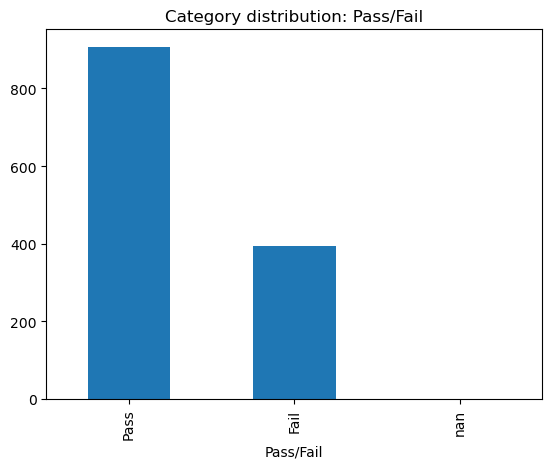

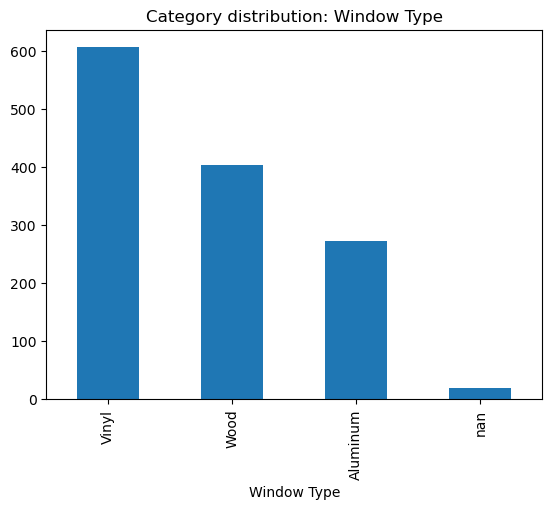

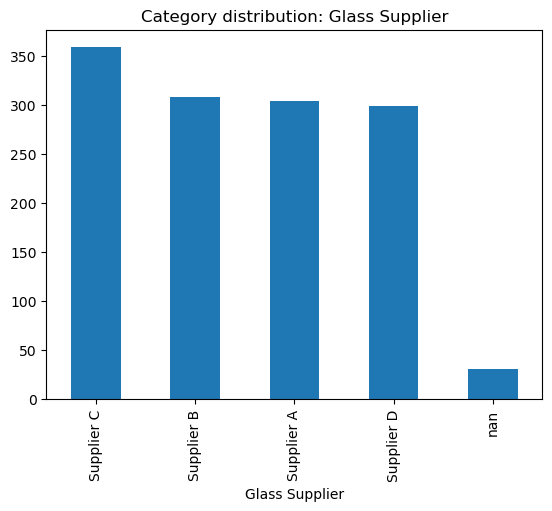

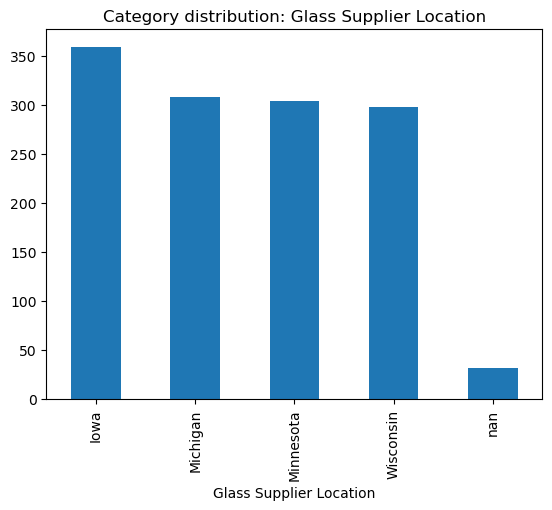

In [5]:
cat_cols = [c for c in df.columns if is_object_dtype(df[c])]
for col in cat_cols:
    df[col].value_counts(dropna=False).plot.bar()
    plt.title(f"Category distribution: {col}")
    plt.show()